In [115]:
from __future__ import print_function, division

%matplotlib inline

import pandas as pd
import numpy as np
import thinkstats2
import thinkplot

In [116]:
beer = pd.read_csv('beers.csv')

In [117]:
print(beer)
#Checking if the CSV was uploaded correctly.

      Unnamed: 0    abv   ibu    id                  name  \
0              0  0.050   NaN  1436              Pub Beer   
1              1  0.066   NaN  2265           Devil's Cup   
2              2  0.071   NaN  2264   Rise of the Phoenix   
3              3  0.090   NaN  2263              Sinister   
4              4  0.075   NaN  2262         Sex and Candy   
...          ...    ...   ...   ...                   ...   
2405        2405  0.067  45.0   928             Belgorado   
2406        2406  0.052   NaN   807         Rail Yard Ale   
2407        2407  0.055   NaN   620       B3K Black Lager   
2408        2408  0.055  40.0   145   Silverback Pale Ale   
2409        2409  0.052   NaN    84  Rail Yard Ale (2009)   

                               style  brewery_id  ounces  
0                American Pale Lager         408    12.0  
1            American Pale Ale (APA)         177    12.0  
2                       American IPA         177    12.0  
3     American Double / Imperia

In [118]:
import matplotlib.pyplot as plt

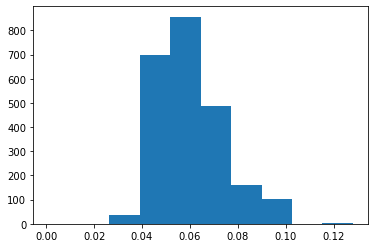

In [119]:
abv_hist = plt.hist(beer['abv'])
abv_hist
mean_abv = beer.abv.mean()
mode_abv = beer.abv.mode()


In [195]:
mean_abv = beer.abv.mean()
mean_abv

0.05977342419080093

In [196]:
mode_abv

0    0.05
dtype: float64

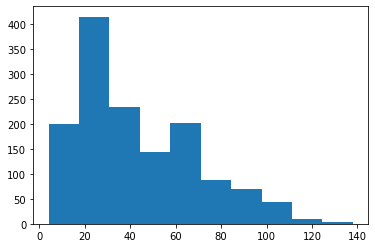

In [120]:
ibu_hist= plt.hist(beer['ibu'])
mean_ibu = beer.ibu.mean()
mode_ibu = beer.ibu.mode()

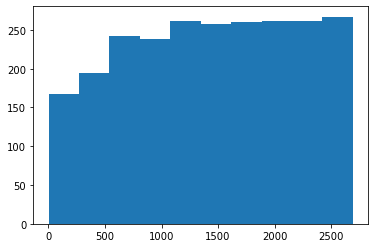

In [121]:
id_hist= plt.hist(beer['id'])
id_hist
mean_id = beer.id.mean()
mode_id = beer.id.mode()

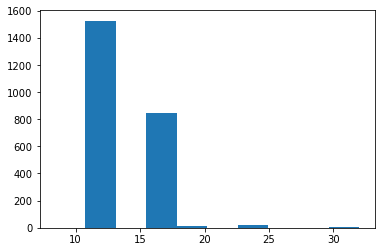

In [122]:
ounces_hist=plt.hist(beer['ounces'])
ounces_hist
mean_ounces = beer.ounces.mean()
mode_ounces = beer.ounces.mode()

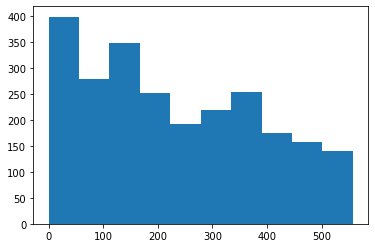

In [123]:
brewery_hist=plt.hist(beer['brewery_id'])
brewery_hist
mean_brewery = beer.brewery_id.mean()
mode_brewery = beer.brewery_id.mode()

In [124]:
#All the histograms had to remain separate because of the varrying units of measurement amongst them
# Possible outliers inculde the ounces that are less then 10, abv that is more than 0.10
# since my question is regarding popularity and not an average I will leave those that are significantly larger alone. 

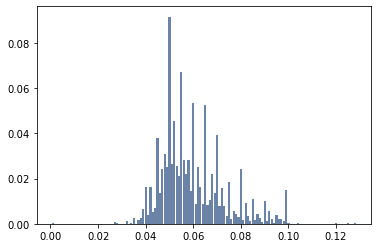

In [125]:
abv= beer.abv
abv
pmf = thinkstats2.Pmf(abv, label='Alcohol by Volume')
thinkplot.hist(pmf)


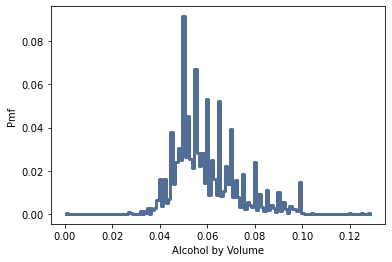

In [126]:
thinkplot.pmf(pmf)
thinkplot.Config(xlabel='Alcohol by Volume', ylabel='Pmf')

In [127]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

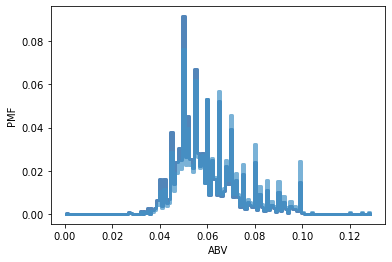

In [193]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='ABV', ylabel='PMF')
#Actual vs observed distributions

In [129]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 0.05977342419080066
Observed mean 0.06284001197024539


In [130]:
#observed mean is very close to the actual mean the uncertainty of this model is low meaning that it is a good fit 

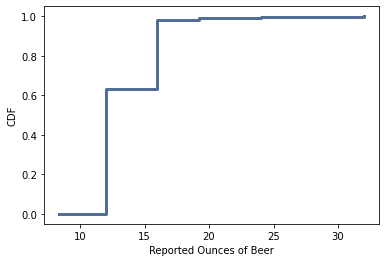

In [131]:
ounces = beer.ounces
ounces
cdf = thinkstats2.Cdf(ounces, label='Ounces of Beer')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Reported Ounces of Beer', ylabel='CDF', loc='upper left')

In [132]:
cdf.Prob(12)
#12 seems to be the pivoting point when it comes to ounces of beer. I wanted to see the probability
# 66% of the beers reported are less than or equal to 12 ounce volumes

0.6331950207468879

In [133]:
iqr = (cdf.Percentile(25), cdf.Percentile(75))
iqr
# this is not shocking given the graph...Lets try a different variable, lets go back to abv

(12.0, 16.0)

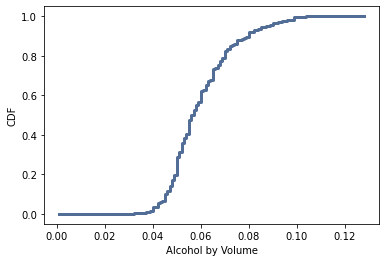

In [134]:
cdf_abv = thinkstats2.Cdf(abv, label='Alcohol by Volume')
thinkplot.Cdf(cdf_abv)
thinkplot.Config(xlabel='Alcohol by Volume', ylabel='CDF', loc='upper left')
#This graph proves to be more interesting to me

In [135]:
cdf_abv.Prob(.06)
# 62% of beer are less than or equal to .06 ABV

0.6201022146507666

In [136]:
cdf_abv.Value(0.5)
# Checking the analysis it seems to line up the median of the ABV is equal to .06

0.056

In [137]:
iqr = (cdf_abv.Percentile(25), cdf_abv.Percentile(75))
iqr
#interquatile range give the intervals .05 and .071 for the percentiles above

(0.05, 0.067)

In [138]:
# these two cdfs tell me that people are going to order a craft beer the is 12 oz or less and that has a ABV of .06 on
#average. The ounces are not shocking however the abv is quite interesting to me.

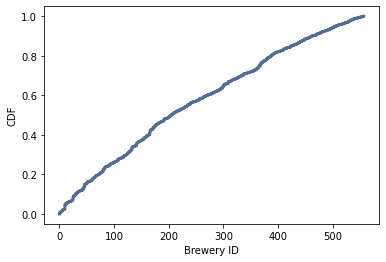

In [139]:
#lets see what brewery ID seems to be the most popular. 
brewery= beer.brewery_id
brewery
cdf_brewery = thinkstats2.Cdf(brewery, label='Brewery ID')
thinkplot.Cdf(cdf_brewery)
thinkplot.Config(xlabel='Brewery ID', ylabel='CDF', loc='upper left')

In [140]:
#Above are the breweries that are reported by the individuals in the study. 
# 1-30 are the midwest 30-150 is the south including texas 150-300 is the north east including MI and the rest is the West 
#coast including washington and idaho

In [141]:
cdf_brewery.Prob(150)


0.37302904564315353

In [142]:
cdf_brewery.Value(0.5)

205

In [143]:
iqr = (cdf_brewery.Percentile(25), cdf_brewery.Percentile(75))
iqr

(93, 366)

In [144]:
#What I like about the probability code is that I can put whatever number I want to in their for the regions and find out
# The probability that that region is represented in this data.

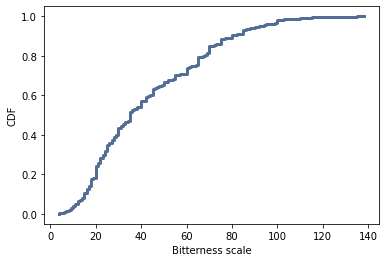

In [145]:
ibu= beer.ibu
ibu
cdf_ibu = thinkstats2.Cdf(beer.ibu, label='CDF')
thinkplot.Cdf(cdf_ibu)
thinkplot.Config(xlabel='Bitterness scale', ylabel='CDF', loc='upper left')

In [146]:


def MakeNormalModel(ibu):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(ibu)
    std = np.sqrt(var)
    print('n, mean, std', len(ibu), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf_ibu)

n, mean, std 1405 1.5469347906417543 0.27161268971274827


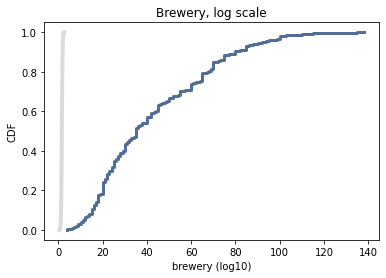

In [198]:
log_ibu = np.log10(ibu)
MakeNormalModel(log_ibu)
thinkplot.Config(title='Brewery, log scale', xlabel='brewery (log10)',
                 ylabel='CDF', loc='upper right')

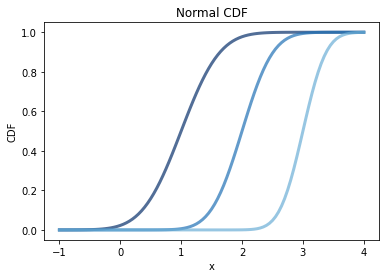

In [148]:
#THis model does not seem to be a good fit lets try something else
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

Mean, Var nan nan
Sigma nan


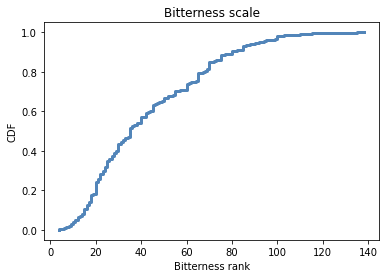

In [149]:
mu, var = thinkstats2.TrimmedMeanVar(ibu, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(ibu, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf_ibu) 
thinkplot.Config(title='Bitterness scale',
                 xlabel='Bitterness rank',
                 ylabel='CDF')

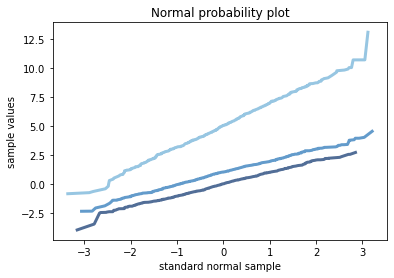

In [150]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

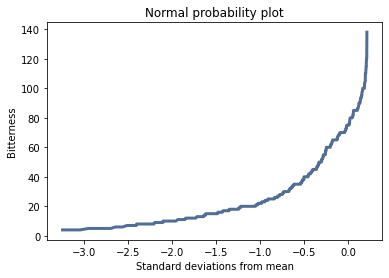

In [151]:
mean, var = thinkstats2.TrimmedMeanVar(ibu, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(ibu)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Bitterness')

In [152]:
# This is a little bit better model. We could trim the tails however, it is hard to decide where it starts and ends
#I will just be leaving it alone. 

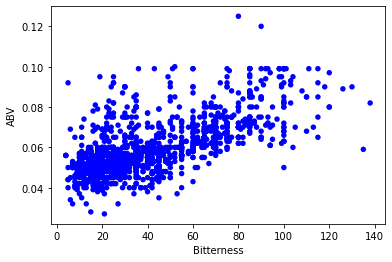

In [153]:
thinkplot.Scatter(ibu, abv, alpha=1)
thinkplot.Config(xlabel='Bitterness',
                 ylabel='ABV',
                 legend=False)

In [154]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [155]:
cleaned = beer.dropna(subset=['abv', 'ibu'])

In [156]:
abv, ibu = cleaned.abv, cleaned.ibu
Cov(abv, ibu)

0.23613259305226628

In [157]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [158]:
Corr(abv, ibu)

0.6706214849969862

In [159]:

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [160]:
SpearmanCorr(abv, ibu)

0.6677798298121673

In [167]:
#covariance and correlation seem to be similar and both positive. I would make the assumption that they are have a 
#relationship with one another. 
beerid= beer.id

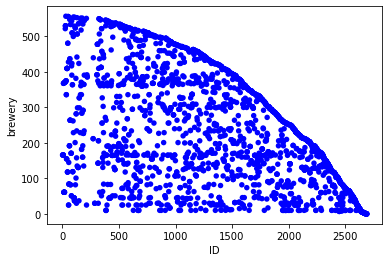

In [168]:
thinkplot.Scatter(beerid, brewery, alpha=1)
thinkplot.Config(xlabel='ID',
                 ylabel='brewery',
                 legend=False)

In [171]:
Corr(beerid, brewery)

-0.5040299676747658

In [172]:
SpearmanCorr(beerid, brewery)

-0.50609746416977

In [173]:
Cov(beerid, brewery)

-59779.401947452694

In [174]:
#not as clean as the last one...

In [175]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [180]:

data = cleaned.abv.values, cleaned.ibu.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [181]:
ht.actual, ht.MaxTestStat()

(0.6706214849969862, 0.08123529556899195)

In [182]:
data = beerid, brewery
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [183]:
ht.actual, ht.MaxTestStat()

(0.5040299676747658, 0.060289477999955675)

In [184]:
#the p-value is probably smaller than  1/1000 , but it is not actually 0.
#actual correlation to the largest value we saw in the simulations.
#I tested correlation here 

In [186]:
import statsmodels.formula.api as smf

formula = 'abv ~ ibu'
model = smf.ols(formula, data=beer)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abv   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1147.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          3.26e-184
Time:                        13:25:10   Log-Likelihood:                 4467.2
No. Observations:                1405   AIC:                            -8930.
Df Residuals:                    1403   BIC:                            -8920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0449      0.001     86.786      0.000       0.044       0.046
ibu            0.0004   1.04e-05     33.863      0.000       0.000       0.000
==============================================================================
Omnibus:                      309.379   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.854
Skew:                           1.170   Prob(JB):                    7.48e-170
Kurtosis:                       5.799   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
inter = results.params['Intercept']
slope = results.params['ibu']
inter, slope

(0.044930280659347344, 0.0003507957687398686)

In [189]:
slope_pvalue = results.pvalues['ibu']
slope_pvalue

3.2633951947915584e-184

In [190]:
results.rsquared

0.449733176139563

In [192]:
formula = 'abv ~ ibu + brewery'
results = smf.ols(formula, data=beer).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    abv   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     573.3
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.10e-182
Time:                        13:27:23   Log-Likelihood:                 4467.5
No. Observations:                1405   AIC:                            -8929.
Df Residuals:                    1402   BIC:                            -8913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0452      0.001     68.991      0.000       0.044       0.046
ibu            0.0004   1.04e-05     33.852      0.000       0.000       0.000
brewery    -1.211e-06   1.79e-06     -0.677      0.499   -4.72e-06     2.3e-06
==============================================================================
Omnibus:                      306.588   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.616
Skew:                           1.162   Prob(JB):                    3.40e-167
Kurtosis:                       5.774   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""